# **2 LAB**

# Аналогично первой лабораторной работе, удаляем повторения и коррелирующие признаки

In [1]:
import pandas as pd # для работы с данными: объектами, признаками, результатами
import numpy as np # для работы с матрицами и многомерными массивами
import seaborn as sns # визуализация
import matplotlib.pyplot as plt # визуализация

In [2]:
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('winequality-red.csv') # читаем данные сета из comma-separated file

In [5]:
data.head(15) # вывод некоторого количества строк данных 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
print(data.shape) # размер датасета всего (строки, столбцы)

data.drop_duplicates(inplace=True) # удалене повторяющихся строк (inplace - удалить дубликаты в самом образце или вернуть копию с удаленными)
 # data.drop([ '__' ], axis = 'columns') - удалениие признаков, если не нужны
data.shape # были удалены 240 повторяющихся строк

(1599, 12)


(1359, 12)

In [7]:
corr = data.corr().abs()

In [8]:
ncorr = corr.copy()
# массив коррелирующих признаков для удаления
toDel = []

for row in ncorr.index:
    for column in ncorr[row].index: 
        if ncorr[row][column] >= 0.65 and ncorr[row][column] != 1: 
            if not row in toDel:
              toDel.append(column)
            ncorr[row][column] = '*'
        else:
            ncorr[row][column] = ' '
ncorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,*,,,,,*,*,,,
volatile acidity,,,,,,,,,,,,
citric acid,*,,,,,,,,,,,
residual sugar,,,,,,,,,,,,
chlorides,,,,,,,,,,,,
free sulfur dioxide,,,,,,,*,,,,,
total sulfur dioxide,,,,,,*,,,,,,
density,*,,,,,,,,,,,
pH,*,,,,,,,,,,,
sulphates,,,,,,,,,,,,


In [9]:
# датасет без коррелирующих признаков
cleared = data.drop(toDel, axis = 1) # axis = 1 - удаляем столбцы
cleared.head(15)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,11.0,0.56,9.4,5
1,7.8,0.880,2.6,0.098,25.0,0.68,9.8,5
2,7.8,0.760,2.3,0.092,15.0,0.65,9.8,5
3,11.2,0.280,1.9,0.075,17.0,0.58,9.8,6
5,7.4,0.660,1.8,0.075,13.0,0.56,9.4,5
6,7.9,0.600,1.6,0.069,15.0,0.46,9.4,5
7,7.3,0.650,1.2,0.065,15.0,0.47,10.0,7
8,7.8,0.580,2.0,0.073,9.0,0.57,9.5,7
9,7.5,0.500,6.1,0.071,17.0,0.80,10.5,5
10,6.7,0.580,1.8,0.097,15.0,0.54,9.2,5


In [10]:
# разделяем датасет, выделяем таргет пизнаки (которые стремимся научиться определять) и остальные
train_matrix = cleared[cleared.columns[:-1]] # признаки
target = cleared[cleared.columns[-1]] # таргетированный признак (качество вина)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# разделили наборы таргет признаков и остальных на 2 выборки (20% - для валидации 80% - обучение) random_state - перемешивание данных перед разделением 
# (результаты воспроизводим, seed = 42 (самые популярные сиды согласно документации библиотеки - 0 и 42))
x_train, x_test, y_train, y_test = train_test_split(train_matrix, target, test_size=0.2, random_state=42)

# Рассмотрим распределение и возможную зависимость признаков

In [13]:
arrD = []
for i in x_train:
  arrD.append(i)
arrD

['fixed acidity',
 'volatile acidity',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'sulphates',
 'alcohol']

Рассмотри гистограммы распределения

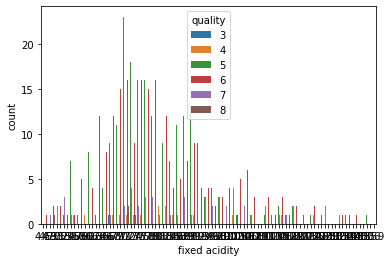

In [14]:
sns.countplot(x_train[arrD[0]], hue=y_train)

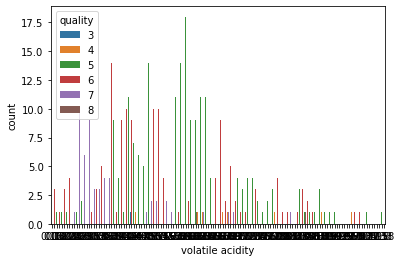

In [15]:
sns.countplot(x_train[arrD[1]], hue=y_train)

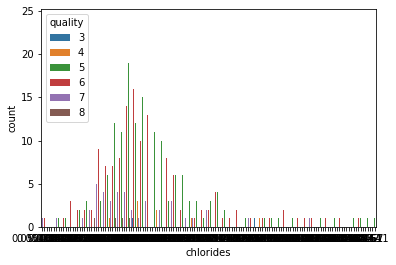

In [16]:
sns.countplot(x_train[arrD[3]], hue=y_train)

Гистаграммы остальных признаков имеют схожую картину, нет явно выделяющихся закономерностей.

Построим PairGrid.

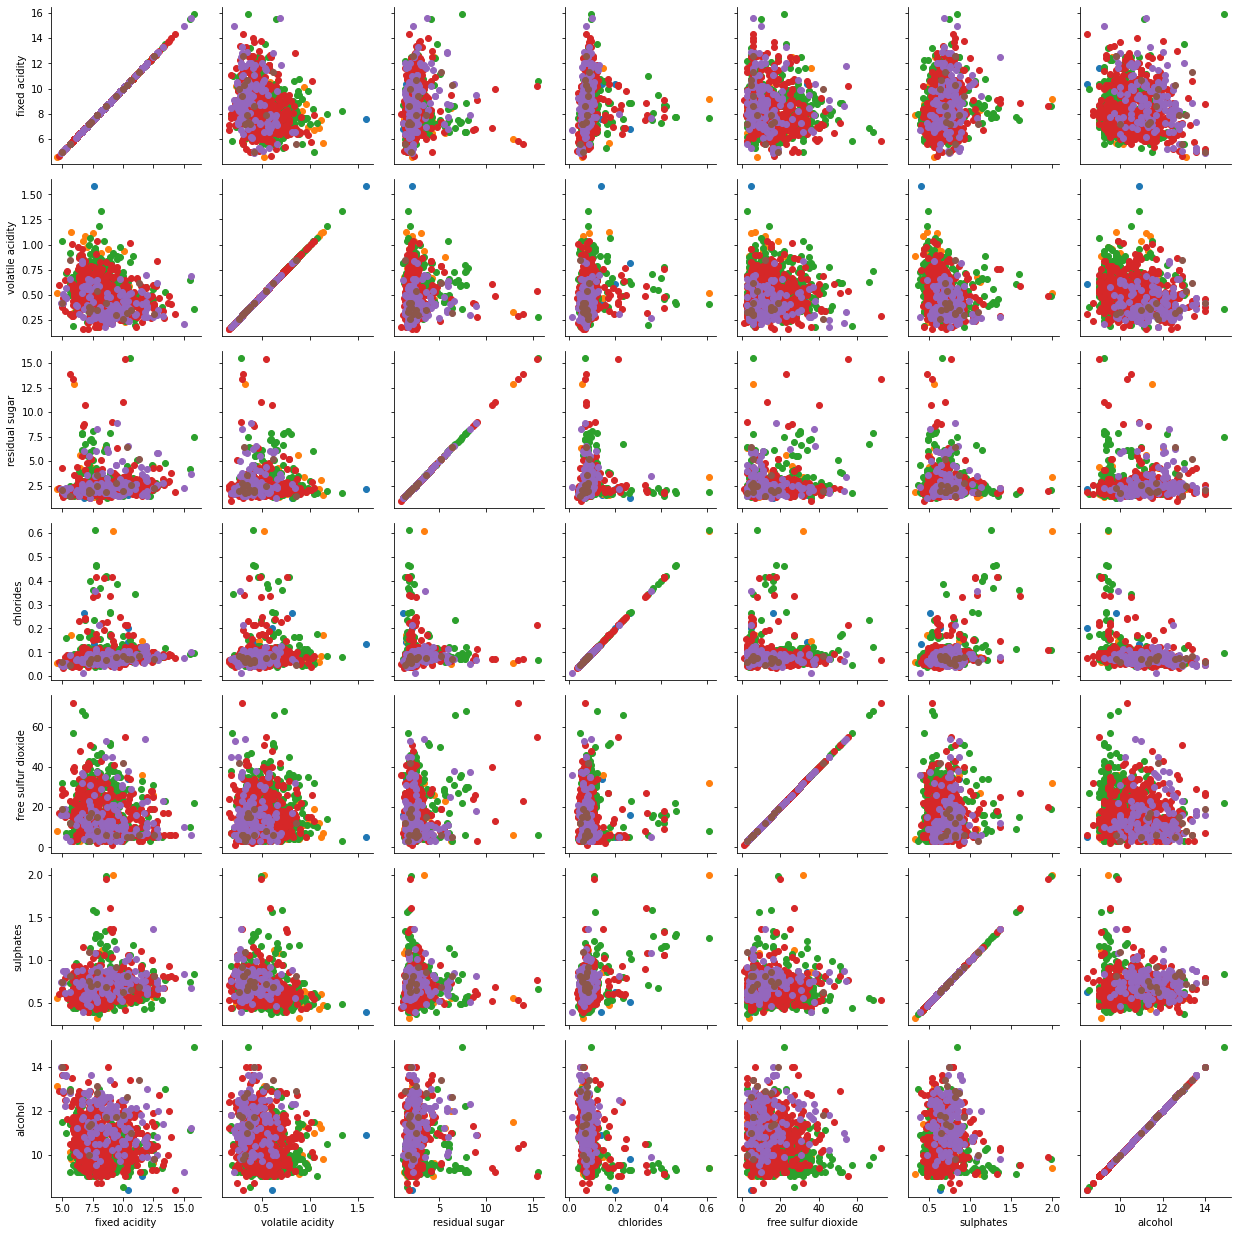

In [17]:
pairgrid = x_train[arrD]
pairgrid['quality'] = y_train

sns.PairGrid(pairgrid, hue='quality').map(plt.scatter)

Рассмотрим выбросы
boxplot 
прямоугольники - 50% всех значений
медиана - средний элемент среди отсортированных
края - число которых незначительно


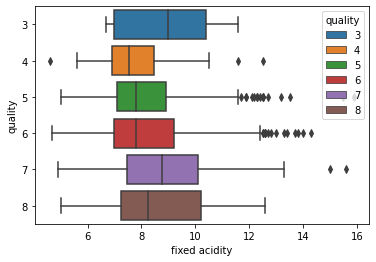

In [18]:
sns.boxplot(x = x_train[arrD[0]], y = y_train, hue=y_train, dodge=False, orient="h")

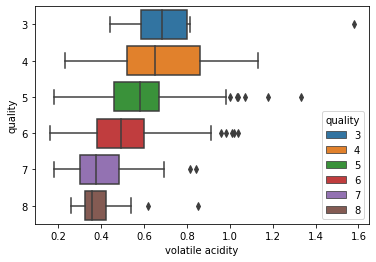

In [19]:
sns.boxplot(x = x_train[arrD[1]], y = y_train, hue=y_train, dodge=False, orient="h")

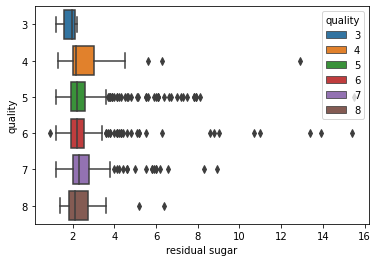

In [20]:
sns.boxplot(x = x_train[arrD[2]], y = y_train, hue=y_train, dodge=False, orient="h")

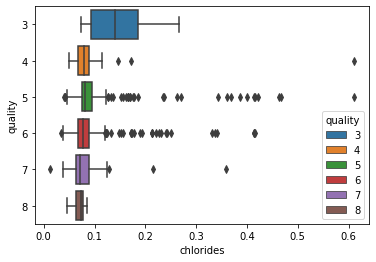

In [21]:
sns.boxplot(x = x_train[arrD[3]], y = y_train, hue=y_train, dodge=False, orient="h")

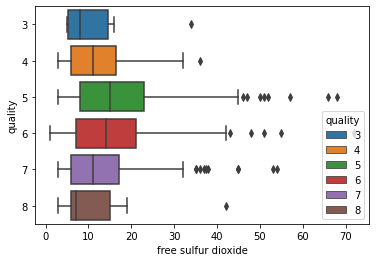

In [22]:
sns.boxplot(x = x_train[arrD[4]], y = y_train, hue=y_train, dodge=False, orient="h")

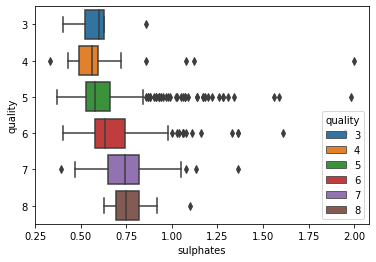

In [23]:
sns.boxplot(x = x_train[arrD[5]], y = y_train, hue=y_train, dodge=False, orient="h")

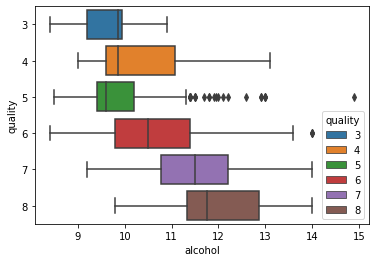

In [24]:
sns.boxplot(x = x_train[arrD[6]], y = y_train, hue=y_train, dodge=False, orient="h")

Плотности распределения величин
выбросы - хвосты

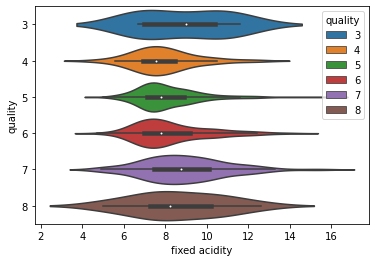

In [25]:
sns.violinplot(x = x_train[arrD[0]], y = y_train, hue=y_train, dodge=False, orient="h")

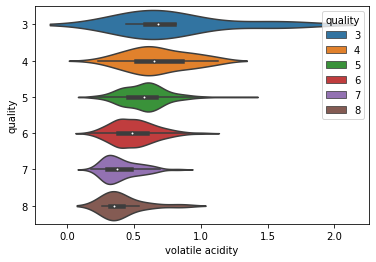

In [26]:
sns.violinplot(x = x_train[arrD[1]], y = y_train, hue=y_train, dodge=False, orient="h")

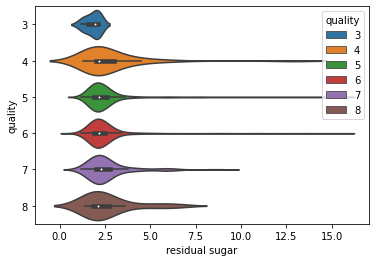

In [27]:
sns.violinplot(x = x_train[arrD[2]], y = y_train, hue=y_train, dodge=False, orient="h")

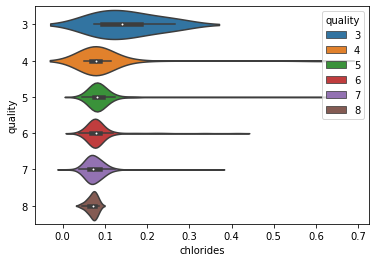

In [28]:
sns.violinplot(x = x_train[arrD[3]], y = y_train, hue=y_train, dodge=False, orient="h")

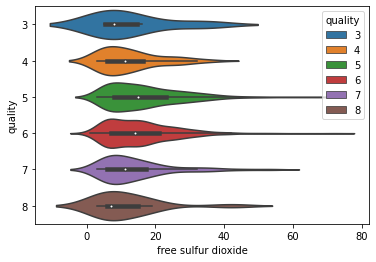

In [29]:
sns.violinplot(x = x_train[arrD[4]], y = y_train, hue=y_train, dodge=False, orient="h")

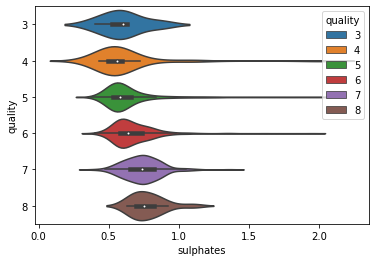

In [30]:
sns.violinplot(x = x_train[arrD[5]], y = y_train, hue=y_train, dodge=False, orient="h")

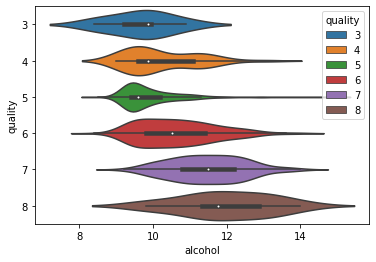

In [31]:
sns.violinplot(x = x_train[arrD[6]], y = y_train, hue=y_train, dodge=False, orient="h")

Нормализация

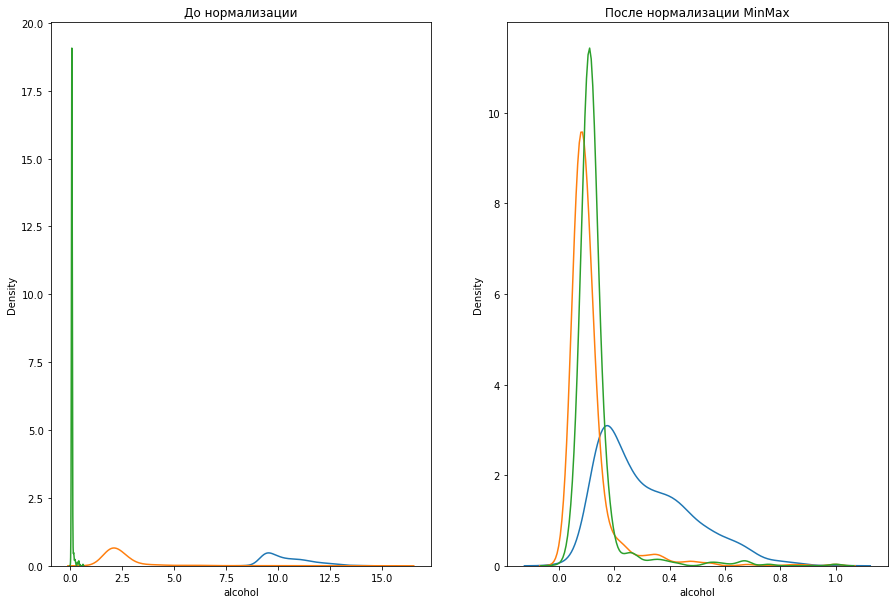

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)

figsize(15,10)
fig, (ax1,ax2) = plt.subplots(ncols=2)
ax1.set_title('До нормализации')
sns.kdeplot(x_train['alcohol'], ax=ax1)
sns.kdeplot(x_train['residual sugar'], ax=ax1)
sns.kdeplot(x_train['chlorides'], ax=ax1)

ax2.set_title('После нормализации MinMax')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['residual sugar'], ax=ax2)
sns.kdeplot(x_train_scaled['chlorides'], ax=ax2)

plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier

print("Качество алгоритма до нормализации: ", KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train).score(x_test,y_test))
print("Качество алгоритма после нормализации: ", KNeighborsClassifier(n_neighbors=3).fit(x_train_scaled,y_train).score(x_test_scaled,y_test))

Качество алгоритма до нормализации:  0.46691176470588236
Качество алгоритма после нормализации:  0.5735294117647058


Для достижения лучших результатов, как в 1й лабораторной работе применим оверсэмплинг, чтобы избавиться от явного дисбаланса классов.

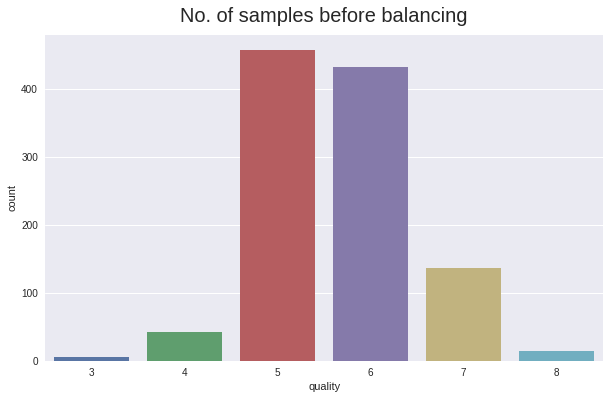

In [34]:
# визуализация частоты классов целевой характеристики после балансировки
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
plt.title("No. of samples before balancing", fontsize=20, y=1.02)
sns.countplot(x = y_train)
plt.show()

In [35]:
from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0) 
# Класс для выполнения случайной передискретизации. Нормализация классов путем случайного отбора выборок с заменой. 
x_ROS, y_ROS = over_samp.fit_resample(train_matrix, target)
x_ROS.shape, y_ROS.shape
# после обработки тестовая выборка стала состоять из 3462 строк

((3462, 7), (3462,))

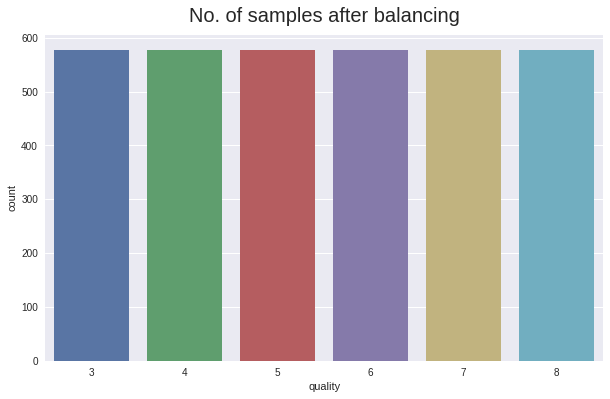

In [36]:
# визуализация частоты классов целевой характеристики после балансировки
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
plt.title("No. of samples after balancing", fontsize=20, y=1.02)
sns.countplot(x = y_ROS)
plt.show()

In [54]:
x_train_smt, x_test_smt, y_train_smt, y_test_smt = train_test_split(x_ROS,y_ROS, test_size = 0.2, random_state = 42)

In [55]:
print("Качество алгоритма до: ", KNeighborsClassifier(n_neighbors=3).fit(x_train_scaled,y_train).score(x_test_scaled,y_test))
print("Качество алгоритма после: ", KNeighborsClassifier(n_neighbors=3).fit(x_train_smt,y_train_smt).score(x_test_smt,y_test_smt))

Качество алгоритма до:  0.5735294117647058
Качество алгоритма после:  0.7619047619047619


нормализация

In [51]:
scaler = MinMaxScaler()
scaler = MinMaxScaler()
train_matrix_scaled = pd.DataFrame(scaler.fit_transform(train_matrix),columns=train_matrix.columns)

In [52]:
from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0) 
# Класс для выполнения случайной передискретизации. Нормализация классов путем случайного отбора выборок с заменой. 
xsr, ysr = over_samp.fit_resample(train_matrix_scaled, target)
xsr.shape, ysr.shape
# после обработки тестовая выборка стала состоять из 3462 строк

((3462, 7), (3462,))

Подбор гиперпараметров

GridSearchCV – это очень мощный инструмент для автоматического подбирания параметров для моделей машинного обучения. GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров. Важно отметить, что такой подход может быть весьма времязатратным.

Воспользуемся им для подбора гиперпараметров для нормализованного набора данных и посмотрим на конечный результат


In [56]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': np.arange(1, 41),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski',
               'seuclidean', 'mahalanobis'],
    'weights': ['uniform', 'distance' ]
}
clf = KNeighborsClassifier()
clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
# Теперь обучение. 
clf_grid.fit(x_ROS, y_ROS)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [57]:
clf_grid.best_params_ # лучшие параметры определенные в ходе обучения

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

In [43]:
from sklearn.metrics import accuracy_score

In [58]:
optimal_clf = KNeighborsClassifier(metric='euclidean', n_neighbors= 1, weights='uniform')
# Обучение.
optimal_clf.fit(x_train_smt,y_train_smt)
# проверка
pred_prob = optimal_clf.predict(x_test_smt)
# количество сделанных предсказаний
accuracy_score(y_test_smt,pred_prob)

0.8138528138528138

Подбор алгоритма

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [60]:
for clf in [KNeighborsClassifier(), DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB()]: # результаты для разных методов классификации для исходного набора данных
  print(clf.__class__.__name__, clf.fit(x_train, y_train).score(x_test, y_test))

KNeighborsClassifier 0.5073529411764706
DecisionTreeClassifier 0.5147058823529411
SGDClassifier 0.28308823529411764
SVC 0.5551470588235294
GaussianNB 0.5882352941176471


In [61]:
for clf in [KNeighborsClassifier(), DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB()]: # результаты для разных методов классификации после нормализации
  print(clf.__class__.__name__, clf.fit(x_train_scaled, y_train).score(x_test_scaled, y_test))

KNeighborsClassifier 0.5992647058823529
DecisionTreeClassifier 0.4963235294117647
SGDClassifier 0.5882352941176471
SVC 0.6213235294117647
GaussianNB 0.5772058823529411


In [62]:
for clf in [KNeighborsClassifier(), DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB()]: # результаты для разных методов классификации после оверсэмплинга исходных данных
  print(clf.__class__.__name__, clf.fit(x_train_smt, y_train_smt).score(x_test_smt, y_test_smt))

KNeighborsClassifier 0.7417027417027418
DecisionTreeClassifier 0.836940836940837
SGDClassifier 0.4401154401154401
SVC 0.4574314574314574
GaussianNB 0.4834054834054834


In [66]:

x_train_12, x_test_12, y_train_12, y_test_12 = train_test_split(xsr, ysr, test_size = 0.2, random_state = 42)
for clf in [KNeighborsClassifier(), DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB()]: # результаты для разных методов классификации после оверсэмплинга нормализованных данных
  print(clf.__class__.__name__, clf.fit(x_train_12, y_train_12).score(x_test_12, y_test_12))

KNeighborsClassifier 0.7806637806637806
DecisionTreeClassifier 0.8326118326118326
SGDClassifier 0.4054834054834055
SVC 0.6652236652236653
GaussianNB 0.4834054834054834


In [67]:
x_ROS_scaled = pd.DataFrame(scaler.fit_transform(x_ROS),columns=x_ROS.columns)
x_train_22, x_test_22, y_train_22, y_test_22 = train_test_split(x_ROS_scaled, y_ROS, test_size = 0.2, random_state = 42)
for clf in [KNeighborsClassifier(), DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB()]: # результаты для разных методов классификации после оверсэмплинга исходных данных и нормализации полученного результата
  print(clf.__class__.__name__, clf.fit(x_train_22, y_train_22).score(x_test_22, y_test_22))

KNeighborsClassifier 0.7806637806637806
DecisionTreeClassifier 0.8326118326118326
SGDClassifier 0.4184704184704185
SVC 0.6652236652236653
GaussianNB 0.4834054834054834


Наиболее результативными оказалось классификации методом ближайших соседей и классификатор деревьев решений.


Метрики качества

код был взят: https://question-it.com/questions/9486547/rasschitat-sklearnroc_auc_score-dlja-multiklassa

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, auc

def roc_auc_score_multiclass(actual_class, pred_class, average = "micro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc
  return roc_auc_dict

def precision_recall_curve_multiclass(actual_class, pred_class):
  precision_dict = dict()
  recall_dict = dict()
  unique_class = set(actual_class)
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    precision, recall, _ = precision_recall_curve(new_actual_class, new_pred_class)

    precision_dict[per_class] = precision
    recall_dict[per_class] = recall
  return precision_dict, recall_dict

def auc_multiclass(recall_dict, precision_dict):
  auc_dict = dict()
  for key, value in recall_dict.items():
    auc_dict[key] = auc(value, precision_dict[key])
  return auc_dict




In [101]:

clf = KNeighborsClassifier()
predict = clf.fit(x_train_12, y_train_12).predict(x_test_12)

print('Accuracy',accuracy_score(y_test_12, predict))
print('Precision',precision_score(y_test_12, predict,average='micro'))
print('Recall',recall_score(y_test_12, predict, average='micro'))
print('ROC AUC',roc_auc_score_multiclass(y_test_12, predict, average='micro'))

pr, rec = precision_recall_curve_multiclass(y_test_12, predict)
print('PRC AUC',auc_multiclass(rec, pr))

Accuracy 0.7806637806637806
Precision 0.7806637806637806
Recall 0.7806637806637806
ROC AUC {3: 0.9973730297723292, 4: 0.9840336134453782, 5: 0.7655351216814159, 6: 0.6210546111027532, 7: 0.8756544502617801, 8: 0.9905660377358491}
PRC AUC {3: 0.988, 4: 0.9188034188034189, 5: 0.6849818731451986, 6: 0.44728652989522555, 7: 0.7712327355184498, 8: 0.9545454545454546}
